Parameters of the best solution : [0.01506 0.02542 0.98518 0.99301 0.19656 0.00626]
Fitness value of the best solution = 2.8293302372078015
Number of generations:  30


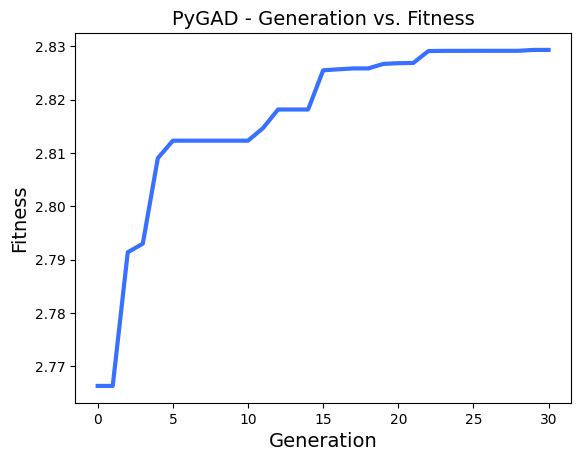

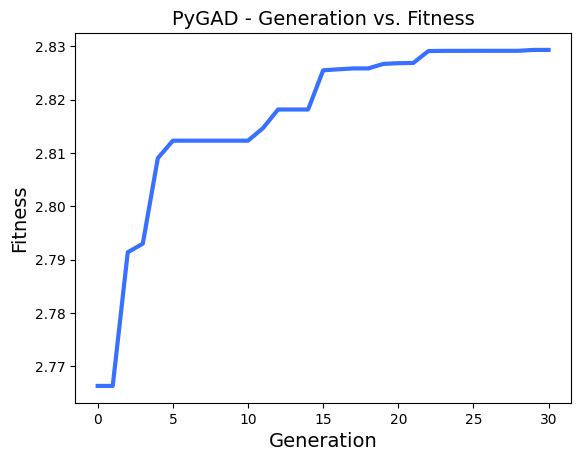

In [5]:
import pygad
import numpy as np
import time
import math


metals = ['x','y','z','v','u','w']

gene_space = np.arange(0,1,1.e-5)
max_weight = 25

def endurance(x, y, z, u, v, w): 
    return math.exp(-2*(y-math.sin(x))**2)+math.sin(z*u)+math.cos(v*w)

# solution = chromosom
def fitness_func(solution, solution_idx):
    return endurance(solution[0], solution[1], solution[2], solution[3], solution[4], solution[5])
    
    
fitness_function = fitness_func

# ile chromsomów w populacji
# ile genow ma chromosom
sol_per_pop = 30
num_genes = len(metals)

# ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
# ile pokolen
# ilu rodzicow zachowac (kilka procent)
num_parents_mating = 5
num_generations = 30
keep_parents = 2

# jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

# w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

# mutacja ma dzialac na ilu procent genow?
# trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 20

# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       )

# uruchomienie algorytmu
ga_instance.run()

# podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(
    solution_fitness=solution_fitness))
print("Number of generations: ", ga_instance.generations_completed)



# tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
# prediction = np.sum(S*solution)
# print("Predicted output based on the best solution : {prediction}".format(
#     prediction=prediction))

# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()


